## Part 1: Preprocessing

In [1]:
# Import required libraries

# Data Handling
import pandas as pd
import numpy as np

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Evaluation Metrics
from sklearn.metrics import classification_report, accuracy_score

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns



#  Import and read the attrition data
attrition_df = pd.read_csv('https://static.bc-edx.com/ai/ail-v-1-0/m19/lms/datasets/attrition.csv')
attrition_df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,94,3,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,61,2,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,92,2,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,56,3,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,40,3,...,3,4,1,6,3,3,2,2,2,2


In [2]:
# Determine the number of unique values in each column
attrition_df.nunique()

Age                         43
Attrition                    2
BusinessTravel               3
Department                   3
DistanceFromHome            29
Education                    5
EducationField               6
EnvironmentSatisfaction      4
HourlyRate                  71
JobInvolvement               4
JobLevel                     5
JobRole                      9
JobSatisfaction              4
MaritalStatus                3
NumCompaniesWorked          10
OverTime                     2
PercentSalaryHike           15
PerformanceRating            2
RelationshipSatisfaction     4
StockOptionLevel             4
TotalWorkingYears           40
TrainingTimesLastYear        7
WorkLifeBalance              4
YearsAtCompany              37
YearsInCurrentRole          19
YearsSinceLastPromotion     16
YearsWithCurrManager        18
dtype: int64

In [3]:
# Create y_df with the Attrition and Department columns
# Create the target dataframe with Attrition and Department columns
y_df = attrition_df[["Attrition", "Department"]]

# Display the first few rows to verify
y_df.head()


,Attrition,Department
0,Yes,Sales
1,No,Research & Development
2,Yes,Research & Development
3,No,Research & Development
4,No,Research & Development


In [5]:
# Define the list of selected feature columns
X_columns = [
    "Education",
    "Age",
    "DistanceFromHome",
    "JobSatisfaction",
    "OverTime",
    "StockOptionLevel",
    "WorkLifeBalance",
    "YearsAtCompany",
    "YearsSinceLastPromotion",
    "NumCompaniesWorked"
]

# Create X_df with the selected columns
X_df = attrition_df[X_columns]

# Display the first few rows to verify
X_df.head()

# Display data types of X_df
print(X_df.dtypes)



Education                   int64
Age                         int64
DistanceFromHome            int64
JobSatisfaction             int64
OverTime                   object
StockOptionLevel            int64
WorkLifeBalance             int64
YearsAtCompany              int64
YearsSinceLastPromotion     int64
NumCompaniesWorked          int64
dtype: object


In [6]:
# Encode categorical columns (OverTime)
label_encoder = LabelEncoder()
X_df["OverTime"] = label_encoder.fit_transform(X_df["OverTime"])


# Define the target variables (y_df) and features (X_df)
y_df = attrition_df[["Attrition", "Department"]]  # Target variables

# Perform train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_df, y_df, test_size=0.2, random_state=42, stratify=y_df["Attrition"]
)

# Display the sizes of training and testing sets
print(f"Training Set Size: {X_train.shape}")
print(f"Testing Set Size: {X_test.shape}")




Training Set Size: (1176, 10)
Testing Set Size: (294, 10)


/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_3789/2812698479.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df["OverTime"] = label_encoder.fit_transform(X_df["OverTime"])


In [7]:
# Convert your X data to numeric data types however you see fit
# Add new code cells as necessary

# Count occurrences of each unique value in the 'OverTime' column
overtime_counts = X_df['OverTime'].value_counts()
print(overtime_counts)


OverTime
0    1054
1     416
Name: count, dtype: int64


In [8]:
# Check for missing values
missing_values = X_df.isnull().sum()
print("Missing values per column:\n", missing_values)

# Identify categorical and numeric columns
categorical_cols = ["OverTime"]  # 'OverTime' is categorical
numeric_cols = [col for col in X_df.columns if col not in categorical_cols]

print("\nCategorical Columns:", categorical_cols)
print("Numeric Columns:", numeric_cols)

# Convert categorical columns using LabelEncoder
label_encoder = LabelEncoder()

for col in categorical_cols:
    X_df[col] = label_encoder.fit_transform(X_df[col])

# Verify transformation
print("\nUpdated Data Types:\n", X_df.dtypes)

# Verify conversion by displaying unique values count
overtime_counts = X_df['OverTime'].value_counts()
print("\nCount of unique values in 'OverTime':\n", overtime_counts)


Missing values per column:
 Education                  0
Age                        0
DistanceFromHome           0
JobSatisfaction            0
OverTime                   0
StockOptionLevel           0
WorkLifeBalance            0
YearsAtCompany             0
YearsSinceLastPromotion    0
NumCompaniesWorked         0
dtype: int64

Categorical Columns: ['OverTime']
Numeric Columns: ['Education', 'Age', 'DistanceFromHome', 'JobSatisfaction', 'StockOptionLevel', 'WorkLifeBalance', 'YearsAtCompany', 'YearsSinceLastPromotion', 'NumCompaniesWorked']

Updated Data Types:
 Education                  int64
Age                        int64
DistanceFromHome           int64
JobSatisfaction            int64
OverTime                   int64
StockOptionLevel           int64
WorkLifeBalance            int64
YearsAtCompany             int64
YearsSinceLastPromotion    int64
NumCompaniesWorked         int64
dtype: object

Count of unique values in 'OverTime':
 OverTime
0    1054
1     416
Name: count, dty

/var/folders/gg/vmh0mv_j5b90pkytkpd35k940000gn/T/ipykernel_3789/3211742997.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_df[col] = label_encoder.fit_transform(X_df[col])


In [9]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the training data (X_train)
scaler.fit(X_train)

# Transform both training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for readability
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Verify scaling: Mean should be around 0, Std Dev should be around 1
print("\nTraining Data Mean After Scaling:\n", X_train_scaled.mean())
print("\nTraining Data Standard Deviation After Scaling:\n", X_train_scaled.std())




Training Data Mean After Scaling:
 Education                  8.760944e-17
Age                       -4.229421e-17
DistanceFromHome          -4.682573e-17
JobSatisfaction            1.601138e-16
OverTime                   5.437827e-17
StockOptionLevel          -3.927320e-17
WorkLifeBalance           -6.948335e-17
YearsAtCompany            -1.586033e-17
YearsSinceLastPromotion   -9.667248e-17
NumCompaniesWorked        -5.739929e-17
dtype: float64

Training Data Standard Deviation After Scaling:
 Education                  1.000425
Age                        1.000425
DistanceFromHome           1.000425
JobSatisfaction            1.000425
OverTime                   1.000425
StockOptionLevel           1.000425
WorkLifeBalance            1.000425
YearsAtCompany             1.000425
YearsSinceLastPromotion    1.000425
NumCompaniesWorked         1.000425
dtype: float64


In [12]:
# Create a OneHotEncoder for the Department column
# Fit the encoder to the training data
# Create two new variables by applying the encoder
# to the training and testing data


# Ensure 'Department' column exists and has no missing values
if y_train["Department"].isnull().sum() > 0 or y_test["Department"].isnull().sum() > 0:
    raise ValueError("Missing values detected in 'Department' column. Handle them before encoding.")

# Initialize OneHotEncoder
dept_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the training department data
dept_encoder.fit(y_train[["Department"]])

# Transform training and testing data
y_train_dept_encoded = dept_encoder.transform(y_train[["Department"]])
y_test_dept_encoded = dept_encoder.transform(y_test[["Department"]])

# Convert to DataFrame
dept_columns = dept_encoder.get_feature_names_out(["Department"])
y_train_dept_encoded = pd.DataFrame(y_train_dept_encoded, columns=dept_columns, index=y_train.index)
y_test_dept_encoded = pd.DataFrame(y_test_dept_encoded, columns=dept_columns, index=y_test.index)

# Verify the transformation
print("\nEncoded Department Columns:\n", dept_columns)
print("\nFirst 5 rows of Encoded Training Data:\n", y_train_dept_encoded.head())




Encoded Department Columns:
 ['Department_Human Resources' 'Department_Research & Development'
 'Department_Sales']

First 5 rows of Encoded Training Data:
       Department_Human Resources  Department_Research & Development  \
1194                         0.0                                0.0   
128                          0.0                                1.0   
810                          0.0                                0.0   
478                          0.0                                0.0   
491                          0.0                                1.0   

      Department_Sales  
1194               1.0  
128                0.0  
810                1.0  
478                1.0  
491                0.0  


In [13]:
# Create a OneHotEncoder for the Attrition column
# Fit the encoder to the training data
# Create two new variables by applying the encoder
# to the training and testing data

# Initialize OneHotEncoder for Attrition
attrition_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit the encoder on the training attrition data
attrition_encoder.fit(y_train[["Attrition"]])

# Transform training and testing data
y_train_attrition_encoded = attrition_encoder.transform(y_train[["Attrition"]])
y_test_attrition_encoded = attrition_encoder.transform(y_test[["Attrition"]])



## Part 2: Create, Compile, and Train the Model

In [14]:
# Find the number of columns in the X training data
input_shape = X_train.shape[1]

# Create the input layer
input_layer = Input(shape=(input_shape,))

# Create at least two shared hidden layers
shared_layer1 = layers.Dense(64, activation='relu')(input_layer)
shared_layer2 = layers.Dense(32, activation='relu')(shared_layer1)



In [15]:
# Create a branch for Department with a hidden layer and an output layer

# Create the hidden layer
dept_hidden = layers.Dense(16, activation='relu')(shared_layer2)

# Create the output layer
dept_output = layers.Dense(y_train_dept_encoded.shape[1], activation='softmax', name="department_output")(dept_hidden)



In [16]:
# Create a branch for Attrition with a hidden layer and an output layer

# Create the hidden layer
attrition_hidden = layers.Dense(8, activation='relu')(shared_layer2)

# Create the output layer
attrition_output = layers.Dense(y_train_attrition_encoded.shape[1], activation='softmax', name="attrition_output")(attrition_hidden)



In [18]:
# Ensure 'department_output' is defined
# Create the model
model = Model(inputs=input_layer, outputs=[attrition_output, dept_output], name="functional")

# Compile the model
model.compile(optimizer='adam',
              loss={'attrition_output': 'categorical_crossentropy', 
                    'department_output': 'categorical_crossentropy'},
              metrics={'attrition_output': 'accuracy', 
                       'department_output': 'accuracy'})

# Summarize the model
model.summary()



Model: "functional"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 10)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           704         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           2080        ['dense[0][0]']                  
                                                                                                  
 dense_3 (Dense)                (None, 8)            264         ['dense_1[0][0]']                
                                                                                         

In [21]:
# Train the model

history = model.fit(
    X_train_scaled,  # Scaled training features
    {"attrition_output": y_train_attrition_encoded, "department_output": y_train_dept_encoded},  # Training targets
    epochs=100,
    batch_size=32,
    validation_data=(X_test_scaled, {"attrition_output": y_test_attrition_encoded, "department_output": y_test_dept_encoded})
)


Epoch 1/100


2025-02-09 14:35:09.368108: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


37/37 [==============================] - 1s 4ms/step - loss: 1.6581 - attrition_output_loss: 0.7668 - department_output_loss: 0.8913 - attrition_output_accuracy: 0.3053 - department_output_accuracy: 0.6412 - val_loss: 1.5144 - val_attrition_output_loss: 0.6869 - val_department_output_loss: 0.8275 - val_attrition_output_accuracy: 0.6293 - val_department_output_accuracy: 0.6701
Epoch 2/100
37/37 [==============================] - 0s 1ms/step - loss: 1.4630 - attrition_output_loss: 0.6640 - department_output_loss: 0.7990 - attrition_output_accuracy: 0.8078 - department_output_accuracy: 0.6497 - val_loss: 1.4515 - val_attrition_output_loss: 0.6496 - val_department_output_loss: 0.8019 - val_attrition_output_accuracy: 0.8401 - val_department_output_accuracy: 0.6701
Epoch 3/100
37/37 [==============================] - 0s 1ms/step - loss: 1.4100 - attrition_output_loss: 0.6293 - department_output_loss: 0.7807 - attrition_output_accuracy: 0.8410 - department_output_accuracy: 0.6497 - val_loss: 

In [22]:
# Evaluate the model with the testing data
# Evaluate the model on the test set
evaluation_metrics = model.evaluate(
    X_test_scaled, 
    {"attrition_output": y_test_attrition_encoded, "department_output": y_test_dept_encoded}, 
    verbose=1
)

# Extract and print the results
print(f"\nTest Loss: {evaluation_metrics[0]}")
print(f"Test Loss - Attrition: {evaluation_metrics[1]}")
print(f"Test Accuracy - Attrition: {evaluation_metrics[2]}")
print(f"Test Loss - Department: {evaluation_metrics[3]}")
print(f"Test Accuracy - Department: {evaluation_metrics[4]}")


10/10 [==============================] - 0s 729us/step - loss: 2.2558 - attrition_output_loss: 0.7203 - department_output_loss: 1.5354 - attrition_output_accuracy: 0.8299 - department_output_accuracy: 0.5170

Test Loss: 2.2557549476623535
Test Loss - Attrition: 0.7203257083892822
Test Accuracy - Attrition: 1.5354294776916504
Test Loss - Department: 0.8299319744110107
Test Accuracy - Department: 0.5170068144798279


In [23]:
# Print the accuracy for both department and attrition
# Evaluate the model on the test set
test_loss, attrition_loss, department_loss, attrition_accuracy, department_accuracy = model.evaluate(
    X_test_scaled, 
    {"attrition_output": y_test_attrition_encoded, "department_output": y_test_dept_encoded}, 
    verbose=0
)

# Print the results
print(f"Test Accuracy - Attrition: {attrition_accuracy:.4f}")
print(f"Test Accuracy - Department: {department_accuracy:.4f}")


Test Accuracy - Attrition: 0.8299
Test Accuracy - Department: 0.5170


# Summary

In the provided space below, briefly answer the following questions.

1. Is accuracy the best metric to use on this data? Why or why not?

2. What activation functions did you choose for your output layers, and why?

3. Can you name a few ways that this model might be improved?

---

## Answers

### 1. Is accuracy the best metric to use on this data? Why or why not?

Accuracy is a useful metric, but it may not be the best for this specific problem. Since the dataset deals with predicting both employee attrition and department placement, other metrics like precision, recall, and F1-score could be more informative. For example, if the dataset is imbalanced—meaning there are significantly more employees staying than leaving—accuracy alone may give a misleadingly high score without truly measuring how well the model identifies employees at risk of leaving. For department predictions, accuracy might also struggle if certain departments have very few employees compared to others. Evaluating the model with additional metrics ensures we understand how well it performs across different situations.

--

### 2. What activation functions did you choose for your output layers, and why?

For predicting employee attrition, we used the **softmax** activation function. This function is useful when predicting categories (such as "leaving" or "staying") because it converts the model's output into probabilities that sum up to 1. This makes it easy to interpret which outcome the model thinks is most likely.

Similarly, for predicting the best department fit, we also used **softmax** since this is another multi-class classification problem. It helps distribute probabilities across multiple departments, allowing us to identify which one the model believes is the best fit for each employee.

--

### 3. Can you name a few ways that this model might be improved?

There are several ways to improve the model:

- **Feature Engineering**: We could explore adding new meaningful features, such as employee performance over time or interactions between existing features, to provide the model with more useful data.
- **Hyperparameter Tuning**: Adjusting settings like the number of layers, neurons per layer, learning rate, or batch size could help the model learn more effectively.
- **Class Imbalance Handling**: If one category (like employees who leave) is much smaller than the other, we could use techniques like oversampling, undersampling, or assigning different weights to the loss function to help the model focus more on the underrepresented group.
- **More Data**: If possible, collecting more real-world employee data could help the model make better predictions by learning from a wider variety of examples.
- **Regularization and Dropout Layers**: Adding dropout layers or regularization techniques can help prevent overfitting, ensuring the model generalizes well to new employee data.

Overall, these strategies can make the model more accurate, robust, and useful for HR decision-making.

---


## Further Exploration - Visuals

---

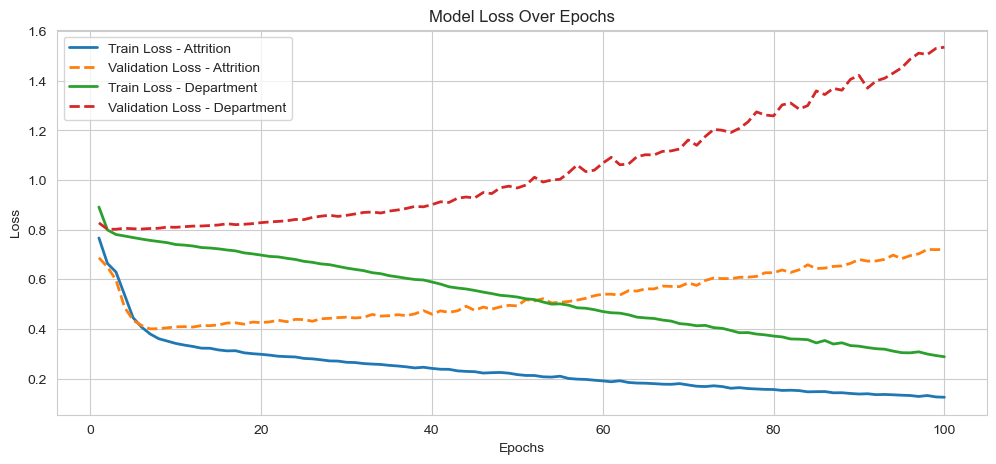

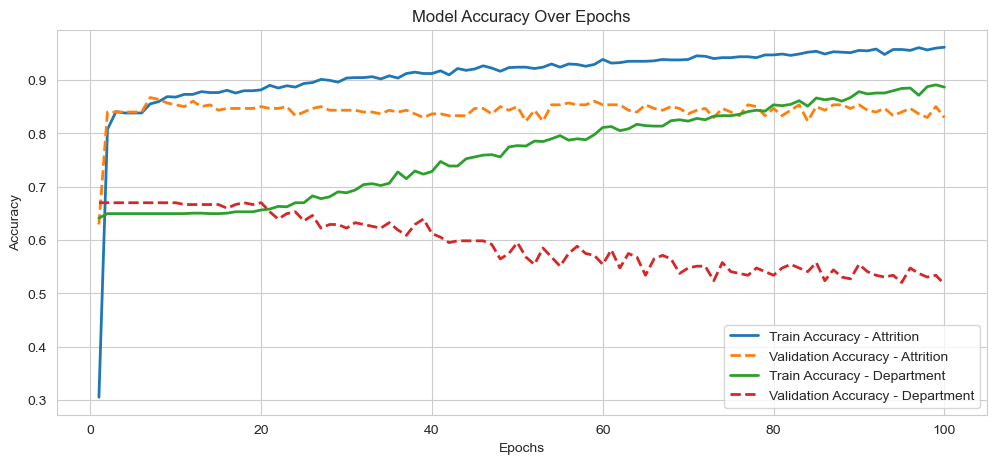

In [24]:
# Set Seaborn style
sns.set_style("whitegrid")

# Extract loss and accuracy values
epochs = range(1, len(history.history['loss']) + 1)

# Create a DataFrame for easier plotting
history_df = pd.DataFrame(history.history, index=epochs)

# Plot Loss for Both Outputs
plt.figure(figsize=(12, 5))
sns.lineplot(x=epochs, y=history_df['attrition_output_loss'], label='Train Loss - Attrition', linewidth=2)
sns.lineplot(x=epochs, y=history_df['val_attrition_output_loss'], label='Validation Loss - Attrition', linestyle="dashed", linewidth=2)
sns.lineplot(x=epochs, y=history_df['department_output_loss'], label='Train Loss - Department', linewidth=2)
sns.lineplot(x=epochs, y=history_df['val_department_output_loss'], label='Validation Loss - Department', linestyle="dashed", linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Model Loss Over Epochs")
plt.legend()
plt.show()

# Plot Accuracy for Both Outputs
plt.figure(figsize=(12, 5))
sns.lineplot(x=epochs, y=history_df['attrition_output_accuracy'], label='Train Accuracy - Attrition', linewidth=2)
sns.lineplot(x=epochs, y=history_df['val_attrition_output_accuracy'], label='Validation Accuracy - Attrition', linestyle="dashed", linewidth=2)
sns.lineplot(x=epochs, y=history_df['department_output_accuracy'], label='Train Accuracy - Department', linewidth=2)
sns.lineplot(x=epochs, y=history_df['val_department_output_accuracy'], label='Validation Accuracy - Department', linestyle="dashed", linewidth=2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Over Epochs")
plt.legend()
plt.show()


---

### Model Performance Analysis

The visualizations provide insights into the model’s performance over 100 epochs, specifically focusing on **loss and accuracy** for both the **attrition prediction** and **department classification** tasks.

#### **Loss Over Epochs**
- The **training loss for attrition** (solid blue) consistently decreases, indicating that the model is effectively learning from the data.
- The **validation loss for attrition** (dashed orange) follows a similar trend initially but starts to rise slightly after a certain point, which could suggest overfitting.
- The **training loss for department classification** (solid green) decreases gradually, suggesting that the model is improving in classifying departments.
- The **validation loss for department classification** (dashed red) increases over time, showing that the model is struggling to generalize well on unseen data. This could be due to **class imbalance**, insufficient training data, or a need for **further tuning**.

#### **Accuracy Over Epochs**
- The **training accuracy for attrition** (solid blue) improves steadily and reaches a high value (~90%), indicating that the model performs well in predicting whether an employee will leave.
- The **validation accuracy for attrition** (dashed orange) remains relatively stable, hovering around 85%, which suggests a reasonable generalization but also potential overfitting.
- The **training accuracy for department classification** (solid green) improves consistently, reaching approximately 80%, indicating that the model is learning from the data.
- The **validation accuracy for department classification** (dashed red) fluctuates and does not improve significantly, staying around **50-60%**, which suggests that the department classification model is not performing well on unseen data.

### **Possible Improvements**
- **Regularization Techniques**: Applying dropout layers or L2 regularization to reduce overfitting.
- **Hyperparameter Tuning**: Adjusting learning rates, batch sizes, and layer sizes for better performance.
- **Feature Engineering**: Including additional relevant features that may improve classification accuracy.
- **Addressing Class Imbalance**: Using techniques such as oversampling, undersampling, or weighted loss functions to improve department classification performance.
